`models.classification` example for binary classification
-----

### Load packages

In [1]:
import transparentai.models.classification as classification
from transparentai.datasets import load_adult

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Load & prepare data

In [2]:
data = load_adult()
X, Y = data.drop(columns='income'), data['income']

In [3]:
X = X.select_dtypes('number')
Y = Y.replace({'>50K':1, '<=50K':0})

Split train test

In [4]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Prepare param

In [6]:
y_true       = Y_train
y_true_valid = Y_valid
y_pred       = clf.predict_proba(X_train)
y_pred_valid = clf.predict_proba(X_valid)

### Use `classification.compute_metrics` 

List of usable metrics on documentation.

You can add custom metrics ! with 
```python 
lambda y_true, y_pred: ...
```

In [7]:
metrics = ['accuracy', 'roc_auc', 'f1', 'recall', 'precision', lambda y_true, y_pred: sum(y_true-y_pred)]
classification.compute_metrics(y_true_valid, y_pred_valid, metrics)

{'accuracy': 0.8130661372378707,
 'roc_auc': 0.8291498517301452,
 'f1': 0.5697558189347423,
 'recall': 0.5247238295633877,
 'precision': 0.6232427366447985,
 'custom_1': 601}

### Use `classification.plot_performance`

#### Only validation

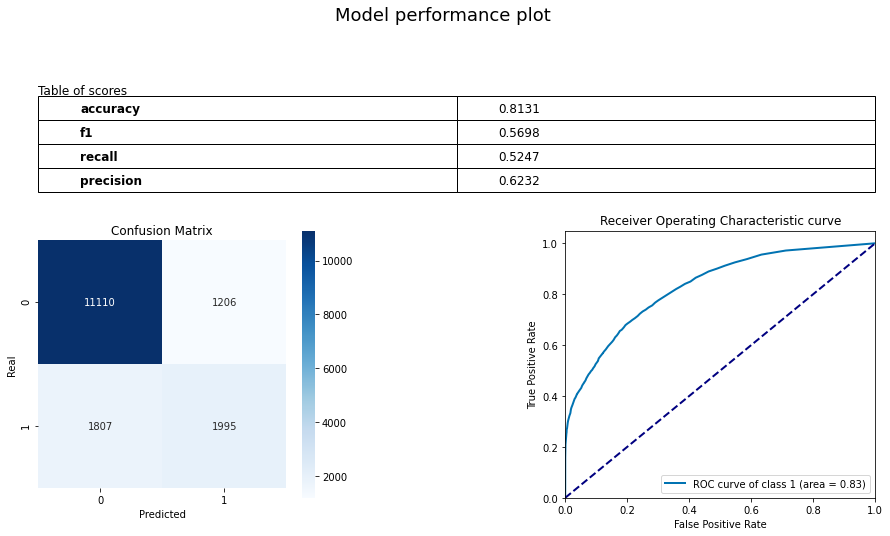

In [17]:
classification.plot_performance(y_true_valid, y_pred_valid)

#### Train set and validation

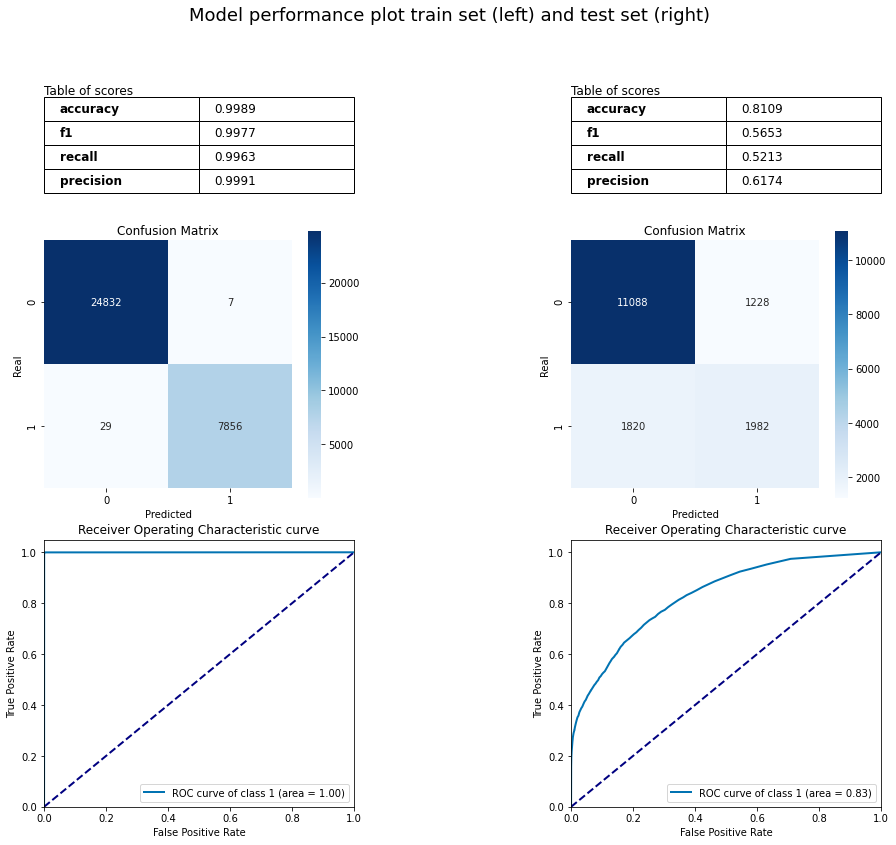

In [9]:
classification.plot_performance(y_true, y_pred, y_true_valid, y_pred_valid)